In [0]:
import pandas as pd #Pandas Import
df = pd.read_csv('https://query.data.world/s/gmqr4kpnfzeiyd7no3nrumydlfyzix') 
#Fetching data from Data.World website(download csv 
#file option is also available)

In [4]:
df.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Prep_Flow_Runtime,Table_Names
0,Deaths,0.0,0.0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,3/31/2020,Time Series
1,Confirmed,16.0,0.0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.0000,9.0000,3/31/2020,Time Series
2,Deaths,0.0,0.0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,3/31/2020,Time Series
3,Deaths,0.0,0.0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.0167,153.4000,3/31/2020,Time Series
4,Confirmed,0.0,0.0,1/25/2020,Suriname,NaN,NaN,NaN,NaN,3.9193,-56.0278,3/31/2020,Time Series


In [5]:

df['Date']=pd.to_datetime(df.Date) #Converting date into pandas dataframe date format 
df.head()


,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Prep_Flow_Runtime,Table_Names
0,Deaths,0.0,0.0,2020-02-27,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,3/31/2020,Time Series
1,Confirmed,16.0,0.0,2020-02-16,Germany,NaN,NaN,NaN,NaN,51.0000,9.0000,3/31/2020,Time Series
2,Deaths,0.0,0.0,2020-01-31,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,3/31/2020,Time Series
3,Deaths,0.0,0.0,2020-03-04,Australia,Queensland,NaN,NaN,NaN,-28.0167,153.4000,3/31/2020,Time Series
4,Confirmed,0.0,0.0,2020-01-25,Suriname,NaN,NaN,NaN,NaN,3.9193,-56.0278,3/31/2020,Time Series


In [6]:
df1=df[df['Country_Region']=='India'] #Retriving cases for India
df1.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Prep_Flow_Runtime,Table_Names
224,Confirmed,1251.0,227.0,2020-03-30,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
388,Deaths,0.0,0.0,2020-02-25,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
394,Deaths,2.0,1.0,2020-03-13,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
490,Deaths,0.0,0.0,2020-02-12,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
788,Confirmed,0.0,0.0,2020-01-29,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series


In [7]:
df2=df1[df1['Case_Type']=='Confirmed'] #Filtering only confirmed cases
df2.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Prep_Flow_Runtime,Table_Names
224,Confirmed,1251.0,227.0,2020-03-30,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
788,Confirmed,0.0,0.0,2020-01-29,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
1556,Confirmed,62.0,6.0,2020-03-11,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
1757,Confirmed,3.0,0.0,2020-02-16,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series
2290,Confirmed,0.0,0.0,2020-01-25,India,NaN,NaN,NaN,NaN,21.0,78.0,3/31/2020,Time Series


In [0]:
df2=df2.sort_values(by='Date') #Sort records by date 
df2['Date']=df2['Date'].astype('datetime64[ns]')

In [20]:
df3=df2.filter(['Date','Cases','Difference'],axis=1) #Filtering only required data
df3=df3.iloc[39:] #Taking data from 1st March onwards
df3.head()

,Date,Cases,Difference
18305,2020-03-01,3.0,0.0
14911,2020-03-02,5.0,2.0
19933,2020-03-03,5.0,0.0
3929,2020-03-04,28.0,23.0
34269,2020-03-05,30.0,2.0


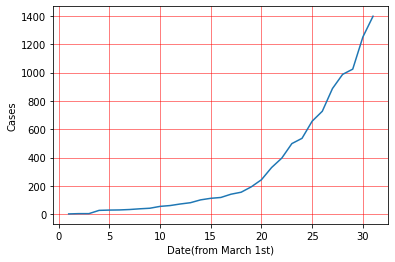

In [10]:
import matplotlib.pyplot as plt      
plt.plot(df3['Date'].dt.day,df3['Cases'])
plt.xlabel('Date(from March 1st)')
plt.ylabel('Cases')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#Plotting line plot using Matplotlib only:- Date vs Cases

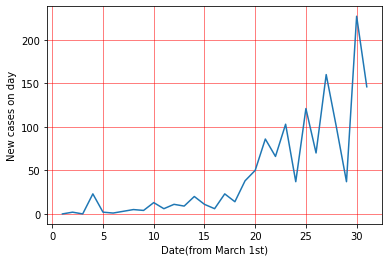

In [11]:
plt.plot(df3['Date'].dt.day,df3['Difference'])
plt.xlabel('Date(from March 1st)')
plt.ylabel('New cases on day')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#Plotting daily found cases (diffrence)
#Source data not updated properly for this graph at this point of time

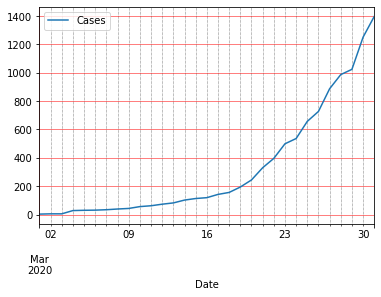

In [12]:
#Plotting Cases vs Date using pandas line plot
fig, ax = plt.subplots()
df3.plot(kind='line', x='Date', y='Cases', ax=ax) 

# Customize the major grid 
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

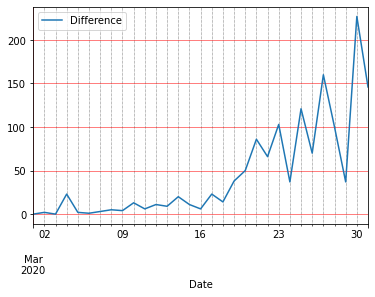

In [13]:
#Plotting Cases vs Diffrence(daily cases found) using pandas line plot

fig, ax = plt.subplots()
df3.plot(kind='line', x='Date', y='Difference', ax=ax)
ax.grid(axis='both',linestyle='-', linewidth='0.5', color='red')

# Customize the major grid#
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
from google.colab import files
plt.savefig("abc.png") #saving Graph in png form
files.download("abc.png") #Downloading Graph

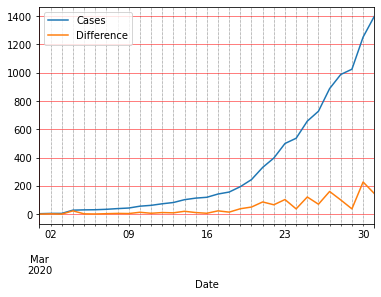

In [14]:
#Plotting both cases and diffrence in one gragh
fig, ax = plt.subplots()
df3.plot(kind='line', x='Date', y='Cases', ax=ax)
df3.plot(kind='line', x='Date', y='Difference', ax=ax)

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [15]:
# Creating Pivot table for converting case type rows to columns
#New columns like confirmed and Deaths are created with corrosponding values 
d1=df1.pivot_table('Cases',['Country_Region','Date'],'Case_Type')
d1.head()

Case_Type                  Confirmed  Deaths
Country_Region Date                         
India          2020-01-22        0.0     0.0
               2020-01-23        0.0     0.0
               2020-01-24        0.0     0.0
               2020-01-25        0.0     0.0
               2020-01-26        0.0     0.0

In [16]:
#Converting pivot table to dataframe fro plotting
d2=pd.DataFrame(d1.to_records())
d2=d2.iloc[39:]#filtering records from 1st March onwards
d2.head()

,Country_Region,Date,Confirmed,Deaths
39,India,2020-03-01,3.0,0.0
40,India,2020-03-02,5.0,0.0
41,India,2020-03-03,5.0,0.0
42,India,2020-03-04,28.0,0.0
43,India,2020-03-05,30.0,0.0


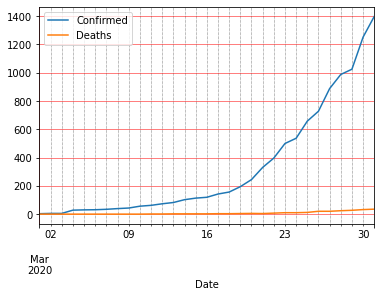

In [17]:
#Plotting cases and deaths on single graph using pandas line plot
fig, ax = plt.subplots()
d2.plot(kind='line', x='Date', y='Confirmed', ax=ax)
d2.plot(kind='line', x='Date', y='Deaths', ax=ax)

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')